<a href="https://colab.research.google.com/github/lilianagalli/itba2/blob/main/IBM_ITBA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q --upgrade pip
!pip install -q qiskit qiskit-aer qiskit[visualization] matplotlib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# Creamos un circuito simple
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

# Configuramos el simulador
sim = Aer.get_backend('aer_simulator')

# Transpilamos el circuito antes de correrlo (nuevo método recomendado)
compiled_circuit = transpile(qc, sim)

# Ejecutamos el circuito
result = sim.run(compiled_circuit, shots=1000).result()

# Mostramos los resultados
counts = result.get_counts()
print("Resultados de la simulación:", counts)

# Visualizamos el circuito y los resultados
qc.draw('mpl')
plot_histogram(counts)
plt.show()


Resultados de la simulación: {'0': 512, '1': 488}


🔹 String de Alice: 0100010001
🔹 Bases de Alice: ['Z', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'X', 'Z']
🔹 Bases de Bob: ['X', 'Z', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
🔹 Resultados de Bob: 0101010000
🔹 Bases iguales en posiciones: [1 4 6 7 8]
🔹 Clave de Alice: 10000
🔹 Clave de Bob  : 10000
🔹 Coincidencia: 5/5 bits correctos (100.0%)


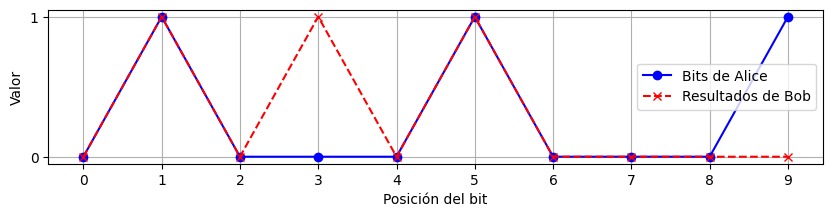

🔹 Con ruido (p=0.2): coincidencia = 4/5 = 80.0%


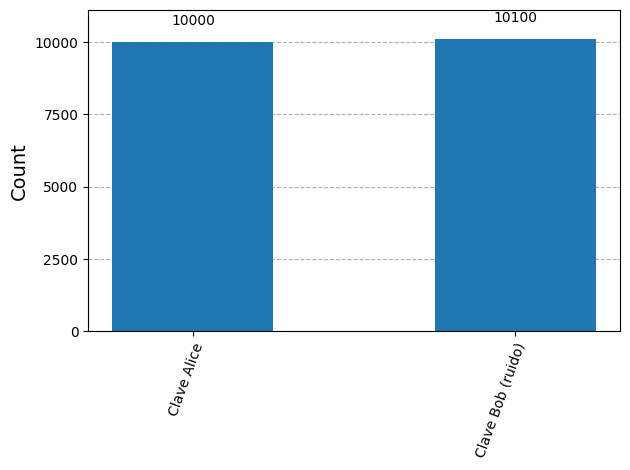

In [3]:
# --- Instalación de librerías (ejecutar una sola vez) ---
!pip install -q qiskit qiskit-aer qiskit[visualization] matplotlib numpy

# --- Importaciones ---
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# --- Parámetros ---
n = 10  # cantidad de bits
np.random.seed(42)

# --- Paso 1: Alice crea una cadena aleatoria ---
alice_bits = np.random.randint(2, size=n)
print("🔹 String de Alice:", ''.join(map(str, alice_bits)))

# --- Paso 2: Alice elige bases aleatorias ---
# 0 = base Z (|0>, |1>), 1 = base X (|+>, |−>)
alice_bases = np.random.randint(2, size=n)
base_symbols = ['Z' if b==0 else 'X' for b in alice_bases]
print("🔹 Bases de Alice:", base_symbols)

# Función para preparar el qubit según el bit y la base
def preparar_qubit(bit, base):
    qc = QuantumCircuit(1, 1)
    if base == 0:  # base Z
        if bit == 1:
            qc.x(0)
    else:           # base X
        qc.h(0)
        if bit == 1:
            qc.z(0)
    return qc

# --- Paso 3: Bob mide con bases aleatorias ---
bob_bases = np.random.randint(2, size=n)
bob_results = []

sim = Aer.get_backend('aer_simulator')

for i in range(n):
    qc = preparar_qubit(alice_bits[i], alice_bases[i])
    # Bob mide
    if bob_bases[i] == 1:
        qc.h(0)
    qc.measure(0, 0)
    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=1).result()
    measured_bit = int(list(result.get_counts().keys())[0])
    bob_results.append(measured_bit)

print("🔹 Bases de Bob:", ['Z' if b==0 else 'X' for b in bob_bases])
print("🔹 Resultados de Bob:", ''.join(map(str, bob_results)))

# --- Paso 4: Sifting ---
# Alice y Bob comparan sus bases y conservan solo las coincidencias
sift_mask = alice_bases == bob_bases
print("🔹 Bases iguales en posiciones:", np.where(sift_mask)[0])

alice_key = alice_bits[sift_mask]
bob_key = np.array(bob_results)[sift_mask]

print("🔹 Clave de Alice:", ''.join(map(str, alice_key)))
print("🔹 Clave de Bob  :", ''.join(map(str, bob_key)))

# --- Paso 5: Comparación y coincidencia ---
matching_bits = np.sum(alice_key == bob_key)
print(f"🔹 Coincidencia: {matching_bits}/{len(alice_key)} bits correctos "
      f"({100*matching_bits/len(alice_key):.1f}%)")

# --- Visualización gráfica ---
fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(alice_bits, 'bo-', label="Bits de Alice")
ax.plot(bob_results, 'rx--', label="Resultados de Bob")
ax.set_xticks(range(n))
ax.set_yticks([0,1])
ax.set_xlabel("Posición del bit")
ax.set_ylabel("Valor")
ax.legend()
ax.grid(True)
plt.show()

# --- Paso extra: Simulación de ruido ---
# Probabilidad de error (por ejemplo 20%)
p_error = 0.2
noisy_bob_results = [(b if np.random.rand()>p_error else 1-b) for b in bob_results]
noisy_bob_key = np.array(noisy_bob_results)[sift_mask]

matching_bits_noisy = np.sum(alice_key == noisy_bob_key)
print(f"🔹 Con ruido (p={p_error}): coincidencia = "
      f"{matching_bits_noisy}/{len(alice_key)} = "
      f"{100*matching_bits_noisy/len(alice_key):.1f}%")

plot_histogram({
    "Clave Alice": ''.join(map(str, alice_key)),
    "Clave Bob (ruido)": ''.join(map(str, noisy_bob_key))
})
